In [45]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import datetime

In [76]:
plt.rcParams['figure.figsize'] = (15, 10)

In [46]:
def path(*ds):
    return os.path.join(get_ipython().starting_dir, *ds) 

In [56]:
class event:
    def __init__(self, line):
        t, self.port, v = line.split()
        self.time = np.dot([*map(float, t.split(':'))], [60*60*1000,60*1000,1000,1,1]) / (60*60*1000)
        self.value = float(v)
    
    def __repr__(self):
        return "{} {} {}".format(self.time, self.port, self.value)

In [57]:
with open(path('../simulation/src/out/fbs'), 'r') as f:
    data = [*map(event, f.readlines())]

In [58]:
ports = {d.port for d in data}
ports

{'grid_demand', 'selling_energy'}

In [62]:
consumption = [(d.time, d.value if d.port == 'grid_demand' else -d.value) for d in data]

In [97]:
acc = [(0.0, 0.0)]
last_time = 0.0
last_value = 0.0
for t, v in consumption:
    acc.append((t, acc[-1][1] + (t-last_time)*last_value))
    last_time, last_value = t, v

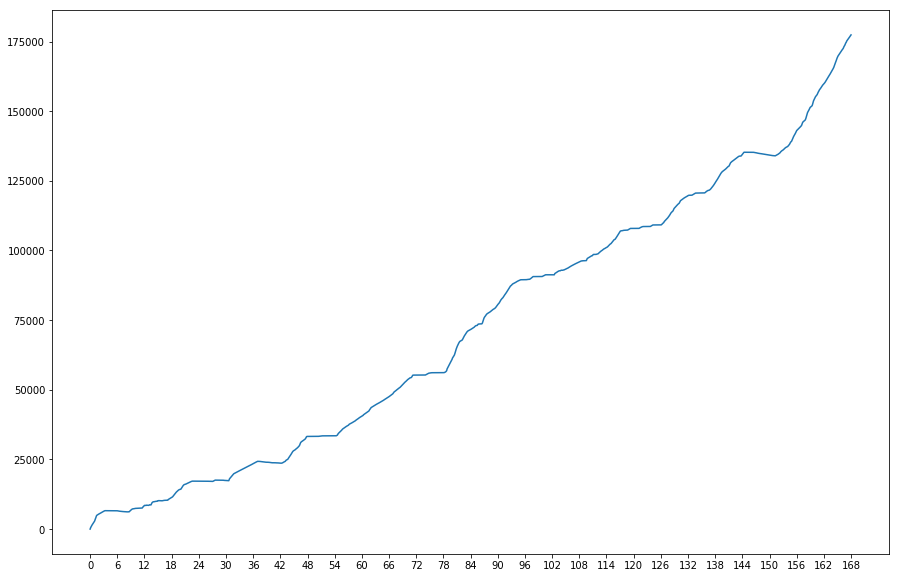

In [100]:
max_time = 24*7
xtick_step = 6
to_plot = [x for x in acc if x[0] <= max_time]
plt.plot(*zip(*to_plot))
plt.xticks(range(0, int(to_plot[-1][0])+1, xtick_step))
pass